In [1]:
import pandas as pd

In [2]:
import spacy

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
import nltk    
from nltk.tokenize import sent_tokenize

In [6]:
import string

In [7]:
import multiprocessing
from gensim.models import Word2Vec
from gensim.models import word2vec

In [3]:
spacy.cli.download("pt_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [4]:
nlp = spacy.load('pt_core_news_sm')

In [26]:
def lemma(txt):
    lemmas = []
    doc = nlp(txt)
    for token in doc:
        if (token.pos_ !='PUNCT'):
            lemmas.append(token.lemma_)
    return lemmas

In [27]:
lemma('A imaginação é mais importante do que o conhecimento ! Esta frase foi proposta por A. Einstein, grande físico')

['A',
 'imaginação',
 'ser',
 'mais',
 'importante',
 'do',
 'que',
 'o',
 'conhecimento',
 'Esta',
 'frase',
 'ser',
 'proposto',
 'por',
 'A.',
 'Einstein',
 'grande',
 'físico']

In [23]:
doc = nlp('A imaginação é mais importante do que o conhecimento ! Esta frase foi proposta por A. Einstein, grande físico')

In [25]:
for token in doc:
  print(token.text, token.lemma_, token.pos_)

A A DET
imaginação imaginação NOUN
é ser AUX
mais mais ADV
importante importante ADJ
do do ADP
que que PRON
o o DET
conhecimento conhecimento NOUN
! ! PUNCT
Esta Esta DET
frase frase NOUN
foi ser AUX
proposta proposto VERB
por por ADP
A. A. PROPN
Einstein Einstein PROPN
, , PUNCT
grande grande ADJ
físico físico NOUN


In [18]:
# viewing sentece's structure
from spacy import displacy
from IPython.display import SVG, display
def showSVG(s):
  display(SVG(s))

graph01 = displacy.render(doc)
showSVG(graph01)

<IPython.core.display.SVG object>

In [19]:
file = open('../../txt/auto_compadecida_3.txt')

In [20]:
sentences = file.readlines()

In [80]:
sentences[5]

'quer benzer o cachorro da mulher para ver se o bicho não morre.'

In [82]:
doc = nlp(sentences[5])
graph01 = displacy.render(doc)
showSVG(graph01)

<IPython.core.display.SVG object>

In [21]:
len(sentences)

2082

In [29]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [30]:
txt = ''
for s in sentences :
    txt = txt + clear(s)

In [31]:
sentences = sent_tokenize(txt)

In [32]:
corpus = []
for s in sentences:
    corpus.append(lemma(s))

In [33]:
corpus

[['e', 'ele', 'vir', 'eu', 'estar', 'desconfiar', 'chicó'],
 ['você', 'ser', 'tão', 'sem', 'confiança'],
 ['eu', 'sem', 'confiança'],
 ['que', 'ser', 'isso', 'joão', 'estar', 'me', 'desconhecer'],
 ['jurar', 'comer', 'ele', 'vir'],
 ['querer',
  'benzer',
  'o',
  'cachorro',
  'da',
  'mulher',
  'parir',
  'ver',
  'se',
  'o',
  'bichar',
  'não',
  'morrer'],
 ['o',
  'dificuldade',
  'não',
  'ser',
  'ele',
  'ver',
  'ser',
  'o',
  'padrar',
  'benzer'],
 ['o',
  'bispar',
  'estar',
  'aí',
  'e',
  'ter',
  'certeza',
  'de',
  'que',
  'o',
  'padrar',
  'joão',
  'não',
  'ir',
  'querer',
  'benzer',
  'o',
  'cachorro'],
 ['não', 'ir', 'benzer'],
 ['por', 'quê'],
 ['que', 'ser', 'que', 'um', 'cachorro', 'ter', 'de', 'mais'],
 ['bom',
  'eu',
  'dizer',
  'assim',
  'porque',
  'saber',
  'comer',
  'esse',
  'povo',
  'ser',
  'cheio',
  'de',
  'coisa',
  'mas',
  'não',
  'ser',
  'nado',
  'de',
  'mais'],
 ['eu', 'mesmo', 'já', 'ter', 'um', 'cavalar', 'bento'],
 ['que

In [34]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
print(cores)

8


In [62]:
model = Word2Vec(min_count=20,
                     window=6,
                     size = 300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [63]:
model.build_vocab(corpus, progress_per=10000)

In [64]:
model.train(corpus, total_examples=len(corpus), epochs=200, report_delay=1)

(255068, 3811800)

In [65]:
model.init_sims(replace=True)

In [66]:
model.wv.most_similar(positive=["mulher"])

[('sair', 0.9997515678405762),
 ('correr', 0.9997308850288391),
 ('dois', 0.9997245073318481),
 ('com', 0.999695897102356),
 ('ir', 0.9996933937072754),
 ('levar', 0.9996815919876099),
 ('todo', 0.999677300453186),
 ('cangaceiro', 0.9996756315231323),
 ('testamento', 0.9996699690818787),
 ('ao', 0.9996688961982727)]

In [67]:
model.wv.most_similar(positive=["joão"])

[('manuel', 0.999796986579895),
 ('casar', 0.99970942735672),
 ('filhar', 0.9996810555458069),
 ('achar', 0.9996721744537354),
 ('nunca', 0.999657392501831),
 ('já', 0.9996490478515625),
 ('mesmo', 0.999631941318512),
 ('bom', 0.9996300339698792),
 ('pois', 0.9996196627616882),
 ('ainda', 0.9995878338813782)]

In [68]:
model.wv.most_similar(positive=["chicó"])

[('morrer', 0.9995610117912292),
 ('joãogrilo', 0.9992002248764038),
 ('palhaço', 0.9987574219703674),
 ('senhor', 0.9986632466316223),
 ('pelar', 0.9984898567199707),
 ('história', 0.9980361461639404),
 ('severino', 0.9980089664459229),
 ('agora', 0.9976971745491028),
 ('compadecido', 0.9975696802139282),
 ('nunca', 0.9973808526992798)]

In [69]:
model.wv.most_similar(positive=["joãogrilo"])

[('pelar', 0.9995927214622498),
 ('severino', 0.9993228912353516),
 ('história', 0.9992867708206177),
 ('palhaço', 0.9992496967315674),
 ('agora', 0.9992380142211914),
 ('chicó', 0.9992002248764038),
 ('compadecido', 0.9991640448570251),
 ('nunca', 0.9990701079368591),
 ('pobre', 0.9989949464797974),
 ('suar', 0.9989752769470215)]

In [70]:
model.wv.most_similar(positive=["cachorro"])

[('coisa', 0.9995681643486023),
 ('ele', 0.999544084072113),
 ('outro', 0.9995309114456177),
 ('benzer', 0.9995020627975464),
 ('falar', 0.9994888305664062),
 ('ficar', 0.9994344711303711),
 ('umar', 0.999424934387207),
 ('mais', 0.9993986487388611),
 ('pedir', 0.9993386268615723),
 ('quando', 0.9993342757225037)]

/home/mardoniofranca/work/env/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


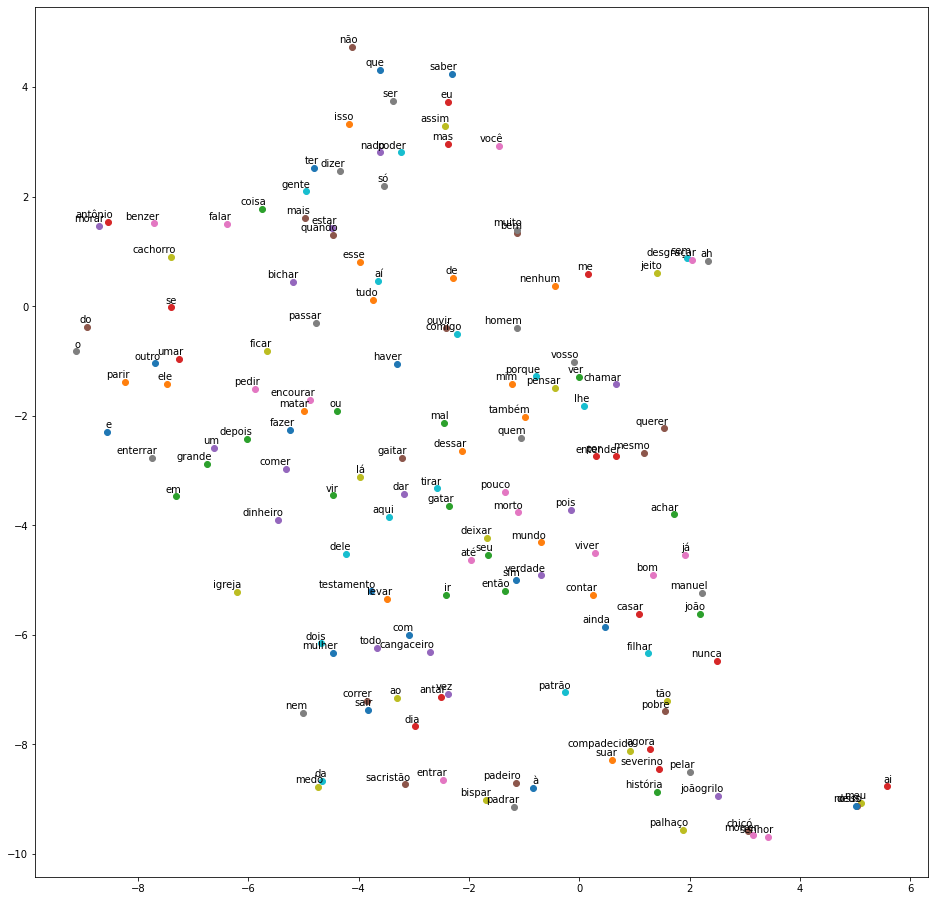

In [71]:
tsne_plot(model)

In [74]:
model = word2vec.Word2Vec(corpus, size=1000, window=20, min_count=50, workers=4)

/home/mardoniofranca/work/env/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


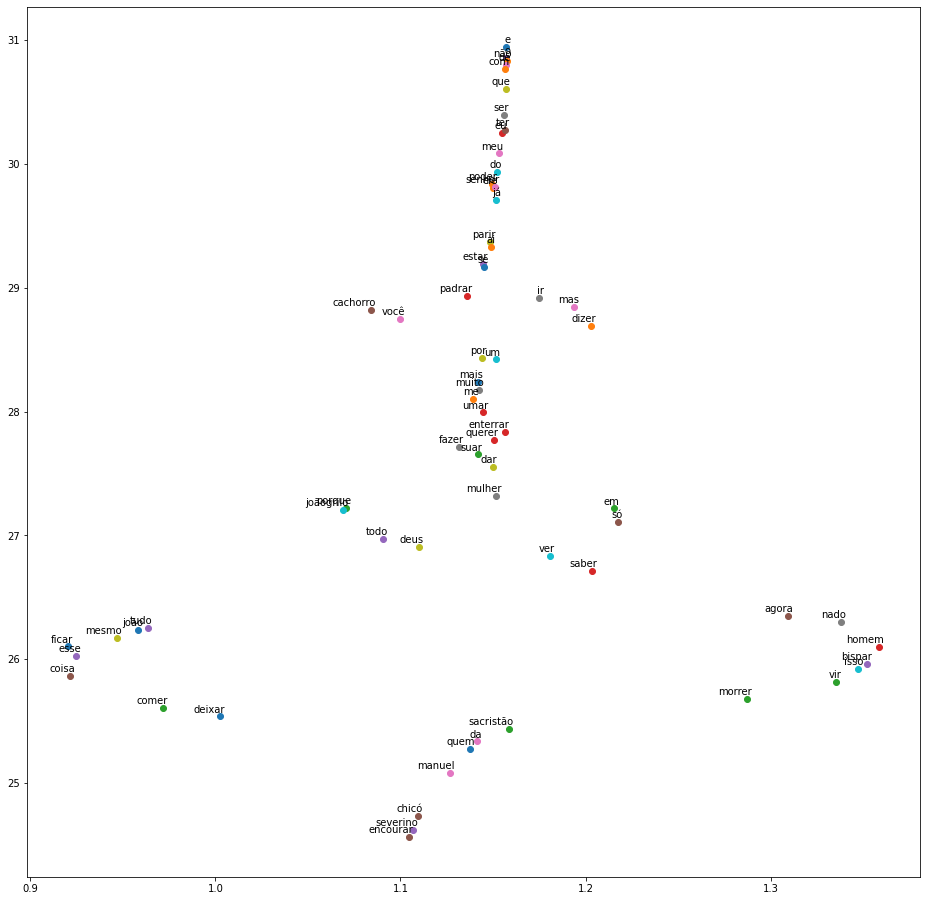

In [75]:
tsne_plot(model)